In [204]:
###================================ Problem statement with dataset find here =========================================

##https://www.kaggle.com/uciml/zoo-animal-classification

###====================================================================================================================
## classify the Animal in Zoo
##There are 16 variables with various traits to describe the animals. The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate

##The purpose for this dataset is to be able to predict the classification of the animals, based upon the variables.

import numpy as np
import matplotlib.pyplot as plt

import pandas

dataset = pandas.read_csv('C:\\Sample.csv')

#print(dataset)

X,y = dataset.loc[:, dataset.columns != "animal_name"],dataset.class_type
## Ensure that the string which is Animal Name here is taken as parameter to exclude while creating input dataset
print(" variables observations  ",X.shape)
print(" Target Observation " , y.shape)

#print("y is ====>" ,  y)







 variables observations   (39, 7)
 Target Observation  (39,)


In [205]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25)
print(" Before  stratefication.................")
print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(y_train) / float(len(y_train)) * 100.0)
print('Test:', np.bincount(y_test) / float(len(y_test)) * 100.0)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    stratify=y)

print(" After stratefication.................")

print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(y_train) / float(len(y_train)) * 100.0)
print('Test:', np.bincount(y_test) / float(len(y_test)) * 100.0)


 Before  stratefication.................
All: [ 0.         48.71794872 51.28205128]
Training: [ 0.         44.82758621 55.17241379]
Test: [ 0. 60. 40.]
 After stratefication.................
All: [ 0.         48.71794872 51.28205128]
Training: [ 0.         48.27586207 51.72413793]
Test: [ 0. 50. 50.]


In [206]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

print(" Before applying scaler =======================")

print(X_train.shape)
print("mean : %s " % X_train.mean(axis=0))
print("standard deviation : %s " % X_train.std(axis=0))


print(" After  applying scaler =======================")
#### Scalar Deviation bring the variables on same scalar. with std deviation as 1
scaler = StandardScaler()


scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
print(X_train_scaled.shape)
print("mean : %s " % X_train_scaled.mean(axis=0))
print("standard deviation : %s " % X_train_scaled.std(axis=0))





 Before applying scaler =======================
(29, 7)
mean : DiskSpace     70.103448
CPU           20.137931
Processes     14.793103
Time-taken    20.137931
X             20.137931
Y             20.137931
class_type     1.517241
dtype: float64 
standard deviation : DiskSpace     11.245141
CPU           11.224094
Processes      5.771725
Time-taken    11.224094
X             11.224094
Y             11.224094
class_type     0.508548
dtype: float64 
 After  applying scaler =======================
(29, 7)
mean : [4.32604144e-16 3.63693749e-17 1.30164079e-16 3.63693749e-17
 3.63693749e-17 3.63693749e-17 2.14387894e-16] 
standard deviation : [1. 1. 1. 1. 1. 1. 1.] 


In [207]:
##It's important to note that the same transformation is applied to the training and the test set. That has the consequence that usually the mean of the test data is not zero after scaling:

X_test_scaled = scaler.transform(X_test)
print("mean test data: %s" % X_test_scaled.mean(axis=0))

###??? figures not recognized as modle
#from figures import plot_relative_scaling
#plot_relative_scaling()


#from figures import plot_scaling
#plot_scaling()




mean test data: [-0.04556275 -0.04877477 -0.1222116  -0.04877477 -0.04877477 -0.04877477
 -0.03450328]


In [208]:
#import mglearn
#mglearn.plots.plot_tree_not_monotone()

In [209]:

from sklearn.model_selection import train_test_split

X_train, X_test, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=1234,stratify=y)
#### Stratefication NOT working across all variables here??

print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_y) / float(len(train_y)) * 100.0)
print('Test:', np.bincount(test_y) / float(len(test_y)) * 100.0)



All: [ 0.         48.71794872 51.28205128]
Training: [ 0.         48.27586207 51.72413793]
Test: [ 0. 50. 50.]


In [210]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               min_samples_leaf=5)

##clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100) using so that the leaf nodes are pure
clf = clf_gini.fit(X_train, train_y)

##################### Prediction using default parametrs #############################################
print("************************************************************")
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

prediction = classifier.predict(X_test)
print("********************Prediction ****************************************")
print(prediction)
print("*********************Actuals***************************************")
print(y_test)

#######################################ends here ##########################33
from inspect import getmembers
##print( getmembers( clf.tree_ ) )





************************************************************
********************Prediction ****************************************
[1 2 2 2 1 1 2 1 2 1]
*********************Actuals***************************************
35    2
8     1
11    1
27    2
18    1
3     1
34    2
20    2
29    2
1     1
Name: class_type, dtype: int64


In [211]:
from sklearn import tree

tree.export_graphviz(clf_gini,out_file='tree.pdf')


y_pred = clf_gini.predict(X_test)
print(y_pred)

[1 2 2 1 1 1 2 2 1 2]


In [212]:
from sklearn.metrics import accuracy_score
print ("Accuracy is ", accuracy_score(test_y,y_pred)*100)

Accuracy is  100.0


In [213]:
print('Samples correctly classified:')
correct_idx = np.where(y_pred == test_y)[0]
print("predicted is " , y_pred[correct_idx])
print("actual  is " , test_y[correct_idx])


#print('\nSamples incorrectly classified:')
#incorrect_idx = np.where(y_pred != test_y)[0]
#print(incorrect_idx)

Samples correctly classified:
predicted is  [1 2 2 1 1 1 2 2 1 2]
actual  is  0    NaN
1    NaN
2    NaN
3    NaN
4    1.0
5    NaN
6    1.0
7    NaN
8    1.0
9    NaN
Name: class_type, dtype: float64


In [214]:
from sklearn.metrics import confusion_matrix

print(classifier.score(X_test, test_y))##### How is score diferent from COnfusion Matrix ?????????????????

print(confusion_matrix(test_y, y_pred))

#pandas.crosstab(test_y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


0.6
[[5 0]
 [0 5]]


In [215]:
from sklearn.metrics import f1_score
f1_score(test_y, y_pred, average='macro')

1.0

In [216]:
#import graphviz
from sklearn.tree import export_graphviz

tree.export_graphviz(clf,out_file='test3.dot')  

### Execute the below command in conda prompt to convert to png
#dot -Tpng test1.dot -o tree.png

In [217]:
#![title](tree1.png)

from IPython.core.display import Image, display
#display(Image('tree3.png', width=200, height=300, unconfined=True))

#tree.export_graphviz(clf,out_file='tree3.dot', class_names=['CPU', 'DiskSpace', 'PROCESSES']) 

########################  dot -Tpng tree.dot -o tree8.png #######################


In [218]:
import pydotplus
import collections

data_feature_names = [ 'DiskSpace', 'CPU Usage', 'Processes' ]
# Visualize data
dot_data = tree.export_graphviz(clf,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

True

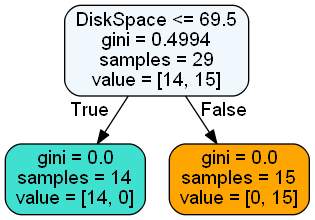

In [219]:
display(Image('tree.png', width=200, height=300, unconfined=True))